# ***QUESTION 1***

---

*Dataset : [Iris Dataset](https://github.com/Shubh-Goyal-07/Machine_Learning/blob/main/PRML_Labs/Lab%204/data/iris/iris.data). Preprocess the dataset, and also perform exploratory analysis. Split the data into training and testing dataset in the ratio 70:30.*

In [ ]:
import pandas as pd
import numpy as np

# importing iris dataset
data_i = pd.read_csv("/content/drive/MyDrive/PRML/Lab 2/iris/iris.data", header=None)
data_i_np = pd.DataFrame.to_numpy(data_i)

for i in range (0, len(data_i_np)):
    if data_i_np[i][4] == 'Iris-setosa':
        data_i_np[i][4] = 0
    elif data_i_np[i][4] == 'Iris-virginica':
        data_i_np[i][4] = 1
    else:
        data_i_np[i][4] = 2

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

In [ ]:
data_i

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn.model_selection import train_test_split as split

#splitting data into train and test set in ratio 70:30
x_train, x_test, y_train, y_test = split(data_i_np[:, 0:4], data_i_np[:, 4], train_size=0.7, random_state=True)

### ***1. Implement a Gaussian Bayes Classifier class from scratch.(You are not allowed to use the inbuilt scikit function, you are only allowed to use numpy and pandas). The classifier class must have 3 variants defined using its constructor, for each of the cases given below.***
### ***2. The Gaussian Bayes Classifier class should also have the following function:a. Train     b. Test     c. Predict     d. Plot decision boundary***

In [ ]:
import math
import matplotlib.pyplot as plt

In [ ]:
class Gaussian_Bayes_Classifier():
    def __init__(self, case_cov):
        self.cov_case = case_cov
        self.x_train = None
        self.y_train = None
        self.classes = []
        self.size = None
        self.class_train = {}
        self.means = {}
        self.prior_prob = {}
        self.covariance = {}

    def __create_classwise_data(self, x_train, y_train):
        self.classes = np.unique(y_train)
        self.size = len(y_train)

        for i in self.classes:
            self.class_train[i] = []

        for i in range(self.size):
            self.class_train[y_train[i]].append(x_train[i])

        for i in self.classes:
            self.class_train[i] = np.array(self.class_train[i])

    def __class_mean(self):
        for cls in self.classes:
            self.means[cls] = np.mean(self.class_train[cls], axis=0)

    def __prior_proba(self):
        sum = 0
        for cls in self.classes:
            self.prior_prob[cls] = len(self.class_train[cls])
            sum += len(self.class_train[cls])

        for cls in self.classes:
            self.prior_prob[cls] /= sum

    def __covar(self):
        for cls in self.classes:
            self.covariance[cls] = np.cov(self.class_train[cls].astype(float), rowvar=False)
            # dummy = np.array(dummy).astype(float)
            # self.covariance.append(np.cov(dummy, rowvar=False))

    def train(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.__create_classwise_data(self.x_train, self.y_train)
        self.__prior_proba()
        self.__class_mean()
        self.__covar()

    def predict(self, x_pred, instance=True):
        y_pred = None
        prob = -32367

        if self.cov_case == 'case1':
            # print(1)
            for i in self.classes:
                s = np.linalg.det(self.covariance[i])
                g = self.means[i]@x_pred/(s**2) - (1/(2*s**2))*(np.matrix.transpose(self.means[i])@self.means[i]) + math.log(self.prior_prob[i])
                # g = -np.linalg.norm(x_pred - self.means[i]) + math.log(self.prior_prob[i])
                if g>prob:
                    prob = g
                    y_pred = i
    
        elif self.cov_case == 'case2':
            # print(2)
            for i in self.classes:
                g = -(1/2)*(np.matrix.transpose(x_pred-self.means[i]))@(np.linalg.inv(self.covariance[i]))@(x_pred - self.means[i]) + math.log(self.prior_prob[i])
                if g>prob:
                    prob = g
                    y_pred = i

        else:
            # print(3)
            for i in self.classes:
                g = -(1/2)*(np.matrix.transpose(x_pred-self.means[i]))@(np.linalg.inv(self.covariance[i]))@(x_pred-self.means[i]) - (1/2)*math.log(np.linalg.det(self.covariance[i])) + math.log(self.prior_prob[i])
                if g>prob:
                    prob = g
                    y_pred = i

        if instance:
            print(y_pred)
        
        return y_pred

    def test(self, x_test, y_test):
        predictions = []

        for i in x_test:
            predictions.append(self.predict(i, False))

        correct = 0
        for i in range(len(y_test)):
            # print(i)
            if y_test[i]==predictions[i]:
                correct += 1
        accuracy = correct/len(y_test)*100

        print(predictions)
        print("Accuracy obtained: ", accuracy)

        return predictions, accuracy

    def plot_decision_boundary(self, columns):
        h = 0.02
        cmap = 'RdYlBu'
        x_min, x_max = self.x_train[:, columns[0]].min() - 10*h, self.x_train[:, columns[0]].max() + 10*h
        y_min, y_max = self.x_train[:, columns[1]].min() - 10*h, self.x_train[:, columns[1]].max() + 10*h
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # print(xx.shape)
        # print(yy.shape)
        # print(xx)
        # print(yy)

        x_train_pdb = np.concatenate((self.x_train[:, columns[0]].reshape(-1, len(self.x_train)), self.x_train[:, columns[1]].reshape(-1, len(self.x_train))), axis=0)
        x_train_pdb = x_train_pdb.transpose()
        
        # Z = clf.test(np.c_[xx.ravel(), yy.ravel()].to_frame())
        clf = Gaussian_Bayes_Classifier(case_cov=self.cov_case)
        clf.train(x_train_pdb, self.y_train)

        print('\nDecision Boundary...')
        clf.test(x_train_pdb, self.y_train)
        # df = np.c_[xx.ravel(), yy.ravel()]

        Z = []
        for i in range(len(xx[:, 0])):
            z=[]
            for j in range (len(xx[0])):
                # print(xx[i][j], yy[i][j])
                y_pred = clf.predict([xx[i][j], yy[i][j]], False)
                z.append(y_pred)
            z= np.array(z)
            Z.append(z)
        Z = np.array(Z)
        # print(len(xx))
        # Z = np.transpose(Z)
        # Z = Z.reshape(xx.shape)
        # print(Z)

        plt.figure(figsize=(5,5))
        plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
        plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
        # for i in self.classes:
        #     plt.scatter(self.class_train[i][:, columns[0]], self.class_train[i][:, columns[1]], c=Y, cmap=cmap, edgecolors='k')
        plt.scatter(self.x_train[:, columns[0]].reshape(-1, len(self.x_train)), self.x_train[:, columns[1]].reshape(-1, len(self.x_train)), c = self.y_train, cmap=cmap, edgecolors='k')
        plt.show()


### ***3. Train the Bayes model on the training dataset and plot the decision boundary for each case implemented in Q1. Comment on the decision boundaries obtained in all the 3 cases. Compare the three models and report how well they perform on the dataset.***

Case 1...
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy obtained:  31.11111111111111

Decision Boundary...
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy obtained:  34.285714285714285


<ipython-input-273-6e07b215995b>:145: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, colors='k', linewidths=0.7)


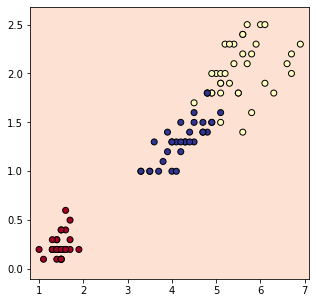

In [ ]:
# Implementing case1 (sigma_mat_i = sigma^2 * I)
classifier = Gaussian_Bayes_Classifier('case1')

print('Case 1...')
classifier.train(x_train, y_train)
classifier.test(x_test, y_test)
classifier.plot_decision_boundary(columns=(2, 3))

Case 2...
[0, 2, 2, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2]
Accuracy obtained:  100.0

Decision Boundary...
[1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 0]
Accuracy obtained:  98.09523809523809


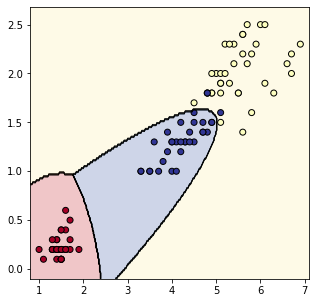

In [ ]:
# Implementing case2 (sigma_mat_i = sigma)
classifier = Gaussian_Bayes_Classifier('case2')

print('Case 2...')
classifier.train(x_train, y_train)
classifier.test(x_test, y_test)
classifier.plot_decision_boundary(columns=(2, 3))

Case 3...
[0, 2, 2, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2]
Accuracy obtained:  100.0

Decision Boundary...
[1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0]
Accuracy obtained:  98.09523809523809


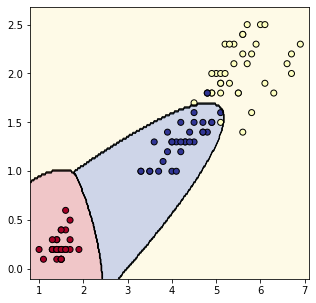

In [ ]:
# Implementing case3 (sigma_mat_i = actual covariance)
classifier = Gaussian_Bayes_Classifier('case3')

print('Case 3...')
classifier.train(x_train, y_train)
classifier.test(x_test, y_test)
classifier.plot_decision_boundary(columns=(2, 3))

### ***4. Perform 5 fold cross validation on the training dataset and report the accuracies on each validation set as well as comment on the generalizability of each model.***

In [ ]:
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import KFold

def fold5_cross_val(model, x_train, y_train):
    kf = KFold(n_splits=5)
    i=1
    avg_acc = 0
    for train_index, test_index in kf.split(x_train, y_train):
        print("Fold ", i, '...')
        i+=1
        X_train, X_test = x_train[train_index], x_train[test_index]
        Y_train, Y_test = y_train[train_index], y_train[test_index]

        model.train(X_train, Y_train)
        predictions, accuracy = model.test(X_test, Y_test)

        avg_acc += accuracy
        print()

    avg_acc = avg_acc/5
    return avg_acc

In [ ]:
model = Gaussian_Bayes_Classifier('case1')
avg_acc = fold5_cross_val(model, x_train, y_train)
print('The average accuracy obtained in case 1 is :', avg_acc)

Fold  1 ...
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy obtained:  38.095238095238095

Fold  2 ...
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy obtained:  28.57142857142857

Fold  3 ...
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy obtained:  33.33333333333333

Fold  4 ...
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy obtained:  47.61904761904761

Fold  5 ...
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy obtained:  23.809523809523807

The average accuracy obtained in case 1 is : 34.28571428571428


In [ ]:
model = Gaussian_Bayes_Classifier('case2')
avg_acc = fold5_cross_val(model, x_train, y_train)
print('The average accuracy obtained in case 2 is :', avg_acc)

Fold  1 ...
[1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1]
Accuracy obtained:  100.0

Fold  2 ...
[0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 1]
Accuracy obtained:  95.23809523809523

Fold  3 ...
[1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0]
Accuracy obtained:  100.0

Fold  4 ...
[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0]
Accuracy obtained:  95.23809523809523

Fold  5 ...
[2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0]
Accuracy obtained:  90.47619047619048

The average accuracy obtained in case 2 is : 96.19047619047619


In [ ]:
model = Gaussian_Bayes_Classifier('case3')
avg_acc = fold5_cross_val(model, x_train, y_train)
print('The average accuracy obtained in case 3 is :', avg_acc)

Fold  1 ...
[1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1]
Accuracy obtained:  100.0

Fold  2 ...
[0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 1]
Accuracy obtained:  95.23809523809523

Fold  3 ...
[1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0]
Accuracy obtained:  100.0

Fold  4 ...
[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0]
Accuracy obtained:  95.23809523809523

Fold  5 ...
[2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0]
Accuracy obtained:  95.23809523809523

The average accuracy obtained in case 3 is : 97.14285714285714


### ***5. Create a synthetic dataset which has 2 features, and data is generated from a circular distribution: x^2 + y^2 = 25. The data has 2 classes, points which have distance <=3 have class=1 and points having distance>3 and distance<= 5 have class=2. {Note that the classes are thus, not linearly separable). Train the implemented Gaussian Bayes Classifier(case 3) on such a synthetic dataset, and plot the decision boundary for the same.***

In [ ]:
self_data = []

rad = np.random.uniform(0, 5, 200)
theta = np.random.uniform(0, 360, 200)

self_X = np.column_stack([rad * np.cos(theta * np.pi / 180.), rad * np.sin(theta * np.pi / 180.)])

self_Y = []
for i in rad:
    if i<3:
        self_Y.append(1)
    else:
        self_Y.append(2)

self_Y = np.array(self_Y)
self_Y = np.transpose(self_Y)

[1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2]
Accuracy obtained:  96.5

Decision Boundary...
[1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 

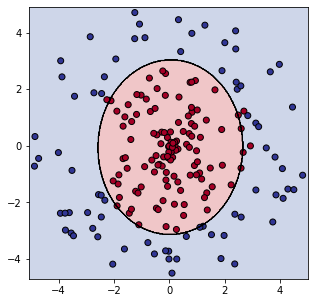

In [ ]:
classifier = Gaussian_Bayes_Classifier('case3')

classifier.train(self_X, self_Y)
classifier.test(self_X, self_Y)
classifier.plot_decision_boundary(columns=(0, 1))

# ***QUESTION 2***

---

*Given the covariance matrix, Σ = [[3/2 , 1/2]
[1/2 , 3/2]], μ = [0 , 0] sample random points from the multivariate normal distribution and use it as a set of datapoints (say X).*


In [1]:
import numpy as np

# defining required matrices

covariance = np.array([[3/2, 1/2], [1/2, 3/2]])
mean = np.array([0, 0])

# creating sample os size 1000 from multivariate normal distribtuion

X = np.random.multivariate_normal(mean, covariance, size=1000)
x_0 = X[:,0]
x_1 = X[:,1]

### ***1. Calculate the covariance matrix of the sample X , say Σ . Find the eigenvectors and eigenvalues of Σ and plot it superimposed on the datapoints X.***

In [2]:
# function to calculate covariance matrix of a two feature matrix

def covar(X):
    '''
    X: features matrix/ matrix containing sample points
    '''

    x_0 = X[:,0]
    x_1 = X[:,1]

    mean_0 = np.mean(x_0)
    mean_1 = np.mean(x_1)

    n = len(x_0)

    a_00, a_10, a_01, a_11 = 0, 0, 0, 0

    for i in range(n):
        a_00 += (x_0[i]-mean_0)**2
        a_11 += (x_1[i]-mean_1)**2
        a_10 += (x_1[i]-mean_1)*(x_0[i]-mean_0)
        a_01 += (x_0[i]-mean_0)*(x_1[i]-mean_1)

    covar_mat = np.array([[a_00, a_01],[a_10, a_11]])
    covar_mat = covar_mat/(n-1)

    return covar_mat

In [3]:
# calculating covariance matrix of X

cov = covar(X)
print("The covariance matrix of X is :", cov)

The covariance matrix of X is : [[1.55608468 0.4804974 ]
 [0.4804974  1.45707727]]


In [4]:
# finding eigen values and eigen vectors of covariance matrix through in built function
w, v = np.linalg.eig(cov)

print('The eigen values are :', w[0], 'and', w[1])
print('The corresponding eigen vectors are ', v[:,0], 'and', v[:,1], 'respectively.')

The eigen values are : 1.9896217249412804 and 1.0235402289939575
The corresponding eigen vectors are  [0.74245656 0.66989421] and [-0.66989421  0.74245656] respectively.


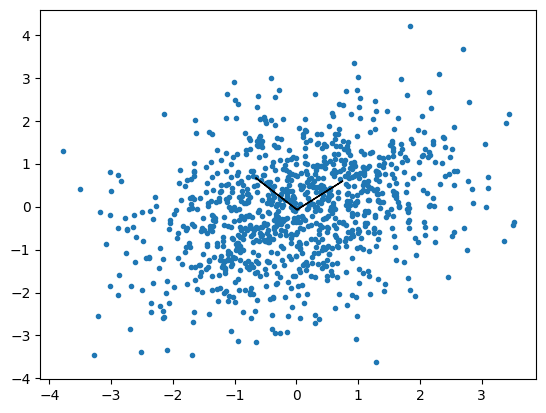

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x_0, x_1, marker='.')

eig_vec1 = v[:,0]
eig_vec2 = v[:,1]
origin = [np.mean(x_0), np.mean(x_1)]   # taking origin as mean of sample

plt.arrow(origin[0], origin[1], eig_vec1[0], eig_vec1[1], length_includes_head=True)
plt.arrow(origin[0], origin[1], eig_vec2[0], eig_vec2[1], length_includes_head=True)

plt.show()

### ***2. Perform the transformation Y = Σ_s−1/2 X on the datapoints X. Calculate the covariance matrix of transformed datapoints Y, say Σ_y. Comment on the obtained covariance matrix and infer Y what was the purpose of the transformation.***

In [12]:
import scipy.linalg

# calculating Σ_s^(−1/2)
inv_cov = np.linalg.inv(cov)
inv_rt_cov = scipy.linalg.sqrtm(inv_cov)
print('sigma power -0.5:', inv_rt_cov)
print('X: ', np.transpose(X))
print(X.shape)

# calculating Y
Y = inv_rt_cov @ np.transpose(X)
print(Y)
Y = np.transpose(Y)


#calculating covariance of Y
cov_y = covar(Y)
print('The covariance matrix of Y is :', cov_y)

sigma power -0.5: [[ 0.83436984 -0.13900677]
 [-0.13900677  0.86301245]]
X:  [[-1.65409375 -1.17065028 -0.29817643 ...  0.13663774  0.3165295
  -0.1142089 ]
 [-0.44768816 -2.0141059   1.38295141 ...  0.30414211 -0.9497251
   0.51144242]]
(1000, 2)
[[-1.31789425 -0.69678093 -0.44102902 ...  0.0717286   0.39612088
  -0.16638642]
 [-0.15643023 -1.57547015  1.23495282 ...  0.24348485 -0.86362432
   0.45725698]]
The covariance matrix of Y is : [[ 1.00000000e+00 -2.23794957e-16]
 [-2.23794957e-16  1.00000000e+00]]


The covariance matrix of Y is diagonal matrix so that we get independent features. (The float falues on non-diagonal matrix are non-zero based on the mathematical implementation of library)

### ***3. Uniformly sample 10 points on the curve x^2 + y^2 = 25. Let these set of points be called P. Plot points in P along with the datapoints in X. Make sure to give each point a different color for better visualization. Report the eucledian distance of each point from μ using barplot.***

In [ ]:
import numpy as np

# sampling 10 points on the given curve
theta = np.random.uniform(0,360,10)
radius = 5

x0 = 5 * np.cos(theta * np.pi / 180.)
x1 = 5 * np.sin(theta * np.pi / 180.)
P = np.column_stack([x0, x1])

# calculating mean of P
u = np.mean(P, axis = 0)

In [ ]:
P

array([[ 4.53597284,  2.10355661],
       [-3.4628899 , -3.60671506],
       [ 0.36096593,  4.98695334],
       [ 0.79058249,  4.93710232],
       [ 1.89364638,  4.62753751],
       [ 4.49843359, -2.18268074],
       [-1.70148143, -4.70159132],
       [ 3.43926398,  3.62925106],
       [ 1.89050538, -4.6288216 ],
       [-4.97160569,  0.53210609]])

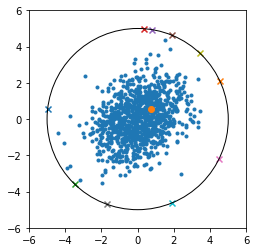

In [ ]:
import matplotlib.pyplot as plt

# plotting the sample X (blue), P (orange cross), given curve and the mean of sample P (green dot)
figure, axes = plt.subplots()

circle = plt.Circle((0,0),5, fill=False)

axes.set_aspect( 1 )
axes.add_artist( circle )

plt.scatter(x_0, x_1, marker='.')

for i in range(len(x0)):
    plt.scatter(x0[i], x1[i], marker = 'x')
plt.scatter(u[0], u[1])

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.show()

<BarContainer object of 10 artists>

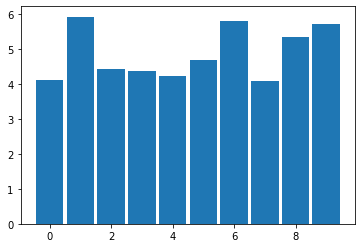

In [ ]:
# calculating distance from u and plotting the barplot

dist = []

for i in range(0, 10):
    sq_dist = np.sum(np.square(P[i] - u))
    eucl_dist = np.sqrt(sq_dist)
    dist.append(eucl_dist)

dist = np.array(dist)

plt.bar([i for i in range(0, 10)], dist, width = 0.90)

### ***4. Perform the transformation Q = Σ_s−1/2 P on the datapoints P. Calculate the eucledian distance of transformed datapoints Q from μ and report it using barplot . Plot points in Q along with datapoints in Y. Make sure that the color of point before and transformation doesn’t change. Comment on the difference in eucledian distance before and after transformations of the points in P.***

In [ ]:
import scipy.linalg

# calculating Q

cov = covar(P)
inv_cov = np.linalg.inv(cov)
inv_rt_cov = scipy.linalg.sqrtm(inv_cov)

Q = inv_rt_cov @ np.transpose(P)

print('Calculated Q is :', Q)

Calculated Q is : [[ 1.35849651 -0.95994657 -0.07777638  0.06049808  0.42252814  1.51189646
  -0.35868264  0.95157899  0.77853604 -1.59841154]
 [ 0.35995853 -0.78357773  1.25418963  1.22494351  1.10368194 -0.72852306
  -1.12992431  0.79021954 -1.24995789  0.3270549 ]]


<BarContainer object of 10 artists>

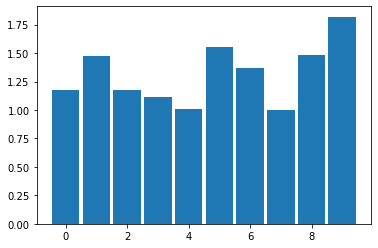

In [ ]:
Q = np.transpose(Q)

# calculating mean
u1 = np.mean(Q, axis = 0)

# calculating distance from u and plotting the barplot

dist = []
for i in range(0, 10):
    sq_dist = np.sum(np.square(Q[i] - u1))
    eucl_dist = np.sqrt(sq_dist)
    dist.append(eucl_dist)

plt.bar([i for i in range(0, 10)], dist, width = 0.90)

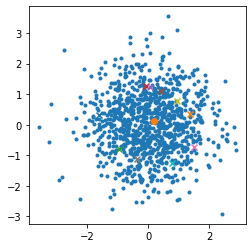

In [ ]:
# plotting Q and Y 
figure, axes = plt.subplots()
axes.set_aspect(1)
plt.scatter(Y[:, 0], Y[:, 1], marker='.')

for i in range(10):
    plt.scatter(Q[i][0], Q[i][1], marker = 'x')
plt.scatter(u1[0], u1[1])

plt.show()